# Creating the  Data Frame

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

In [3]:
# Need to stack my data so I can see the "Programs" in a column, is going to give a series
df = pd.read_csv("UNAMdata2020.csv", index_col = 0, low_memory =False).stack()
# If we wouldn´t change the blank to "999" in "Pulling and Cleaning" program we would have needed to to this:
        #st = type("str")
        #df = df.applymap(lambda x: "999" if isinstance(x, st) and x.isspace() else x)
# Need to create a df with my series object and add the columns
df = pd.DataFrame(df).reset_index() 
df.columns = ["Folio", "Program", "Score"]
df.head()

,Folio,Program,Score
0,52,Febrero 2020 : (101) ACTUARIA-FACULTAD DE CIE...,"('106', '')"
1,64,Febrero 2020 : (101) ACTUARIA-FACULTAD DE CIE...,"('81', '')"
2,123,Febrero 2020 : (101) ACTUARIA-FACULTAD DE CIE...,"('77', '')"
3,125,Febrero 2020 : (101) ACTUARIA-FACULTAD DE CIE...,"('999', 'N')"
4,129,Febrero 2020 : (101) ACTUARIA-FACULTAD DE CIE...,"('59', '')"


In [17]:
df.Program.unique()

array(['Febrero 2018 : (101) ACTUARIA-FACULTAD DE CIENCIAS-Oferta=40-Minimos=106',
       'Febrero 2018 : (101) ACTUARIA-FES ACATLAN-Oferta=36-Minimos=95',
       'Febrero 2018 : (102) ARQUITECTURA-FACULTAD DE ARQUITECTURA-Oferta=190-Minimos=92',
       'Febrero 2018 : (102) ARQUITECTURA-FES ACATLAN-Oferta=62-Minimos=79',
       'Febrero 2018 : (102) ARQUITECTURA-FES ARAGON-Oferta=60-Minimos=79',
       'Febrero 2018 : (103) ARQUITECTURA DE PAISAJE-FACULTAD DE ARQUITECTURA-Oferta=15-Minimos=86',
       'Febrero 2018 : (104) CIENCIAS DE LA COMPUTACION-FACULTAD DE CIENCIAS-Oferta=20-Minimos=105',
       'Febrero 2018 : (105) DISEÑO INDUSTRIAL-FES ARAGON-Oferta=15-Minimos=86',
       'Febrero 2018 : (106) FISICA-FACULTAD DE CIENCIAS-Oferta=72-Minimos=108',
       'Febrero 2018 : (107) INGENIERIA CIVIL-FACULTAD DE INGENIERIA-Oferta=98-Minimos=90',
       'Febrero 2018 : (107) INGENIERIA CIVIL-FES ACATLAN-Oferta=72-Minimos=73',
       'Febrero 2018 : (107) INGENIERIA CIVIL-FES ARAGON-Oferta

In [4]:
# Creating the columns
df["Faculty"] = df.apply(lambda x: x["Program"].split("-")[-3], axis = 1)
df["ScoreMin"] = df.apply(lambda x: x["Program"].split("-")[-1].split("=")[-1], axis = 1)
df["Code"] = df.apply(lambda x: x["Program"].split("-")[0].split()[3].strip("()"), axis = 1)
df["Round"] = df.apply(lambda x: x["Program"].split(":")[0].split()[0], axis = 1)
df["Year"] = df.apply(lambda x: x["Program"].split(":")[0].split()[1], axis = 1)
df["Score"] = df.apply(lambda x: x["Score"].split("'")[1], axis = 1).astype("f")
df["Program"] = df.apply(lambda x: x["Program"].split("-")[0].split(":")[1], axis = 1)
df["Program"] = df.apply(lambda x: x["Program"].split(")")[1:][0].strip(), axis = 1)
#df["Program"] = df.apply(lambda x: re.findall("  (.+)",x["Program"]), axis = 1)

# Setting Types
df["ScoreMin"] = df["ScoreMin"].astype("f")
df["Year"] = df.Year.astype("int64")
df["Code"] = df["Code"].astype("int64")
# Replacing "999.0" for Nan values
df.replace(999.0, np.nan, inplace = True)

In [5]:
df["Program"].unique()

array(['ACTUARIA', 'ARQUITECTURA', 'ARQUITECTURA DE PAISAJE',
       'CIENCIA DE MATERIALES SUSTENTABLES', 'CIENCIAS DE LA COMPUTACION',
       'CIENCIAS DE LA TIERRA', 'DISEÑO INDUSTRIAL', 'FISICA',
       'FISICA BIOMEDICA', 'GEOCIENCIAS',
       'ING. EN TELECOMUNICACIONES, SISTEMAS Y ELECTRONICA',
       'INGENIERIA AMBIENTAL', 'INGENIERIA CIVIL',
       'INGENIERIA DE MINAS Y METALURGIA',
       'INGENIERIA ELECTRICA ELECTRONICA', 'INGENIERIA EN COMPUTACION',
       'INGENIERIA GEOFISICA', 'INGENIERIA GEOLOGICA',
       'INGENIERIA GEOMATICA', 'INGENIERIA INDUSTRIAL',
       'INGENIERIA MECANICA', 'INGENIERIA MECANICA ELECTRICA',
       'INGENIERIA PETROLERA', 'INGENIERIA QUIMICA',
       'INGENIERIA QUIMICA METALURGICA', 'MATEMATICAS',
       'MATEMATICAS APLICADAS', 'MATEMATICAS APLICADAS Y COMPUTACION',
       'TECNOLOGIAS PARA LA INFORMACION EN CIENCIAS', 'URBANISMO',
       'BIOLOGIA', 'BIOQUIMICA DIAGNOSTICA', 'CIENCIAS AGROFORESTALES',
       'CIENCIAS AMBIENTALES', 'CIRUJA

In [6]:
df.replace({'LENGUA Y LITERATURAS MODERNAS (LETRAS ALEMANAS':'LENGUA Y LITERATURAS MODERNAS (LETRAS ALEMANAS)',
           'LENGUA Y LITERATURAS MODERNAS (LETRAS FRANCESAS':'LENGUA Y LITERATURAS MODERNAS (LETRAS FRANCESAS)',
           'LENGUA Y LITERATURAS MODERNAS (LETRAS INGLESAS':'LENGUA Y LITERATURAS MODERNAS (LETRAS INGLESAS)',
           'LENGUA Y LITERATURAS MODERNAS (LETRAS ITALIANAS':'LENGUA Y LITERATURAS MODERNAS (LETRAS ITALIANAS)',
           'LENGUA Y LITERATURAS MODERNAS (LETRAS PORTUGUESAS':'LENGUA Y LITERATURAS MODERNAS (LETRAS PORTUGUESAS)'}, inplace =True)

In [20]:
df.to_excel("C-UNAMdata2018.xlsx", engine = 'openpyxl')

In [7]:
df.head()

,Folio,Program,Score,Faculty,ScoreMin,Code,Round,Year
0,52.0,ACTUARIA,106.0,FACULTAD DE CIENCIAS,107.0,101,Febrero,2020
1,64.0,ACTUARIA,81.0,FACULTAD DE CIENCIAS,107.0,101,Febrero,2020
2,123.0,ACTUARIA,77.0,FACULTAD DE CIENCIAS,107.0,101,Febrero,2020
3,125.0,ACTUARIA,NaN,FACULTAD DE CIENCIAS,107.0,101,Febrero,2020
4,129.0,ACTUARIA,59.0,FACULTAD DE CIENCIAS,107.0,101,Febrero,2020


AttributeError: 'bool' object has no attribute 'all'

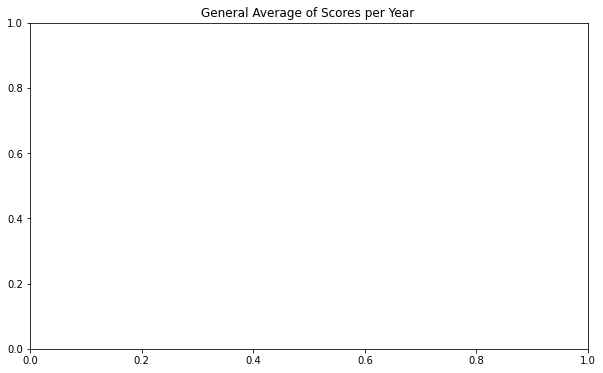

In [37]:
plt.figure (figsize = (10,6))
plt.title('General Average of Scores per Year ')
sns.barplot(x= df.groupby('Program'), y = df.Score)

In [42]:
x = df.groupby('Program')['Score']

### ¿Cuántas personas faltaron al examen?

In [10]:
faltaron = len(df[df.Score.isna()])
faltaron

20991

### ¿Cuántas personas pasaron el examen?

In [11]:
pasaron = len(df[df.Score>=df.ScoreMin])
pasaron

13410

### ¿Tasa de aceptación  2020?

In [12]:
pasaron/len(df) * 100

6.137889682761273

### ¿Calificación promedio?

In [13]:
df["Score"].mean()

58.155174

### ¿Promedio calificación para Actuaría?

In [89]:
df[df["Program"] == "ACTUARIA"]["Score"].mean()

65.34104919433594

### ¿Promedio general por Escuela? (Gráfica de barras)

In [54]:
Ciencias = df[df["Carrera"].startswith("(1")] #TODO

AttributeError: 'Series' object has no attribute 'startswith'

### ¿Promedios por carrera en Escuela de Ciencias? (caja de bigotes)

In [44]:
x = ["ahsbuibndw","ss"]
x[0]+x[1]

'ahsbuibndwss'

In [59]:
x = "(416)  LENGUA Y LITERATURAS MODERNAS (LETRAS FRANCESAS)"
r = re.findall("  (.+)",x)[0]
r

'LENGUA Y LITERATURAS MODERNAS (LETRAS FRANCESAS)'

In [1]:
def gg(x):
    return x

In [4]:
gg(5)

5